### Trabalho Final De Estatística Aplicada

#### Diário de Análises

Colocar a análise abaixo

### Bibliotecas

In [154]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, normaltest, probplot, chi2_contingency

### Lendo a base

In [273]:
##df = pd.read_csv('C:\\GitHub\\Applied Statistics\\PESQUISA-DSA29.csv', sep = ',', encoding = 'utf-8')
df = pd.read_excel('C:\\GitHub\\Applied Statistics\\PESQUISA-DSA29.xlsx')

# Ajuste e tratamentos novos

In [274]:
df= df.drop(["Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
df['altura'].replace('.', '', inplace=True)
df = df.dropna()
df['sexo'] = df['sexo'].map(str.strip)
df.head(500)

C:\Users\renat\AppData\Local\Temp\ipykernel_26648\2586896135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['altura'].replace('.', '', inplace=True)


,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,Murilo Santone de Menezes,1.0,3479030,26.0,M,67.0,183.0,1.0,5.0,3.0,1.0,3.0,1.0
1,Murilo Santone de Menezes,1.0,3479030,42.0,F,65.0,173.0,2.0,4.0,4.0,4.0,1.0,1.0
2,Murilo Santone de Menezes,1.0,3479030,61.0,M,67.0,178.0,2.0,1.0,3.0,4.0,4.0,1.0
3,Murilo Santone de Menezes,1.0,3479030,86.0,F,60.0,165.0,3.0,1.0,6.0,4.0,4.0,1.0
4,Murilo Santone de Menezes,1.0,3479030,24.0,F,70.0,170.0,1.0,2.0,2.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,Felipe Vinicius Torres,33.0,50010000,19.0,F,68.0,170.0,1.0,2.0,4.0,4.0,2.0,1.0
364,Felipe Vinicius Torres,33.0,71510010,38.0,M,95.0,185.0,2.0,4.0,2.0,1.0,2.0,4.0
365,Felipe Vinicius Torres,33.0,94010450,43.0,F,70.0,168.0,3.0,2.0,5.0,4.0,4.0,1.0
366,Felipe Vinicius Torres,33.0,60710020,26.0,M,82.0,178.0,1.0,2.0,1.0,2.0,2.0,2.0


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 367
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pesquisador (aluno)  368 non-null    object 
 1   pesq_id              368 non-null    float64
 2   cep                  368 non-null    object 
 3   idade                368 non-null    float64
 4   sexo                 368 non-null    object 
 5   peso                 368 non-null    float64
 6   altura               368 non-null    float64
 7   estado_civil         368 non-null    float64
 8   escolaridade         368 non-null    float64
 9   consumo_alcool       368 non-null    float64
 10  fumante              368 non-null    float64
 11  exercícios           368 non-null    float64
 12  dieta                368 non-null    float64
dtypes: float64(10), object(3)
memory usage: 40.2+ KB


In [276]:
df_analise = df.iloc[:, 3:13]
df_analise

,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,26.0,M,67.0,183.0,1.0,5.0,3.0,1.0,3.0,1.0
1,42.0,F,65.0,173.0,2.0,4.0,4.0,4.0,1.0,1.0
2,61.0,M,67.0,178.0,2.0,1.0,3.0,4.0,4.0,1.0
3,86.0,F,60.0,165.0,3.0,1.0,6.0,4.0,4.0,1.0
4,24.0,F,70.0,170.0,1.0,2.0,2.0,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
363,19.0,F,68.0,170.0,1.0,2.0,4.0,4.0,2.0,1.0
364,38.0,M,95.0,185.0,2.0,4.0,2.0,1.0,2.0,4.0
365,43.0,F,70.0,168.0,3.0,2.0,5.0,4.0,4.0,1.0
366,26.0,M,82.0,178.0,1.0,2.0,1.0,2.0,2.0,2.0


In [277]:
# Validando valores nulos
df.isnull().sum()

pesquisador (aluno)    0
pesq_id                0
cep                    0
idade                  0
sexo                   0
peso                   0
altura                 0
estado_civil           0
escolaridade           0
consumo_alcool         0
fumante                0
exercícios             0
dieta                  0
dtype: int64

In [278]:
### Separando o dataframe por sexo
df_masculino = df[df['sexo'] == 'M']
df_feminino = df[df['sexo'] == 'F']

In [279]:
### Deixando somente os dados que quantitativos por sexo
df_masculino2 = df_masculino.iloc[:, 3:13]
df_feminino2 = df_feminino.iloc[:, 3:13]

#### Analisando a média, desvio padrão e intervalo de confiança para os dados quantitativos

Dados Quantitativos:
- Peso
- Altura
- Idade

In [280]:
df.head(1)

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,Murilo Santone de Menezes,1.0,3479030,26.0,M,67.0,183.0,1.0,5.0,3.0,1.0,3.0,1.0


In [281]:
# Média Peso
media_peso_masculino = sum(df_masculino2['peso'])/len(df_masculino2['peso'])
media_peso_feminino = sum(df_feminino2['peso'])/len(df_feminino2['peso'])

# Média Altura
media_altura_masculino = sum(df_masculino2['altura'])/len(df_masculino2['altura'])
media_altura_feminino = sum(df_feminino2['altura'])/len(df_feminino2['altura'])

# Média Idade
media_idade_masculino = sum(df_masculino2['idade'])/len(df_masculino2['idade'])
media_idade_feminino = sum(df_feminino2['idade'])/len(df_feminino2['idade'])


# Resultado
print(f'A média do peso masculino é: {media_peso_masculino:.2f}')
print(f'A média do peso feminino é: {media_peso_feminino:.2f}')
print(f'A média da altura masculina é: {media_altura_masculino:.2f}')
print(f'A média da altura feminina é: {media_altura_feminino:.2f}')
print(f'A média de idade masculina é: {media_idade_masculino:.2f}')
print(f'A média de idade feminina é: {media_idade_feminino:.2f}')

A média do peso masculino é: 83.48
A média do peso feminino é: 67.55
A média da altura masculina é: 172.03
A média da altura feminina é: 157.46
A média de idade masculina é: 35.43
A média de idade feminina é: 38.01


In [282]:
# Desvio Padrão Peso
desvio_padrao_peso_masculino = np.std(df_masculino2['peso'])
desvio_padrao_peso_feminino = np.std(df_feminino2['peso'])

# Desvio Padrão Altura
desvio_padrao_altura_masculino = np.std(df_masculino2['altura'])
desvio_padrao_altura_feminino = np.std(df_feminino2['altura'])

# Desvio Padrão Idade
desvio_padrao_idade_masculino = np.std(df_masculino2['idade'])
desvio_padrao_idade_feminino = np.std(df_feminino2['idade'])


# Resultado

print(f'O desvio padrão do peso masculino é: {desvio_padrao_peso_masculino:.2f}')
print(f'O desvio padrão do peso feminino é: {desvio_padrao_peso_feminino:.2f}')
print(f'O desvio padrão da altura masculina é: {desvio_padrao_altura_masculino:.2f}')
print(f'O desvio padrão da altura feminina é: {desvio_padrao_altura_feminino:.2f}')
print(f'O desvio padrão da idade masculina é: {desvio_padrao_idade_masculino:.2f}')
print(f'O desvio padrão da idade feminina é: {desvio_padrao_idade_feminino:.2f}')

O desvio padrão do peso masculino é: 15.44
O desvio padrão do peso feminino é: 14.19
O desvio padrão da altura masculina é: 26.99
O desvio padrão da altura feminina é: 30.98
O desvio padrão da idade masculina é: 13.91
O desvio padrão da idade feminina é: 17.28


In [283]:
# Selecionar as variáveis quantitativas
quantitativas = ['idade', 'peso', 'altura']

In [284]:
# Função para calcular intervalo de confiança
def intervalo_confianca(series, confianca=0.95):
    n = len(series.dropna())  # Contar valores não nulos
    media = np.mean(series)
    desvio_padrao = np.std(series, ddof=1)  # ddof=1 para amostra
    erro_padrao = desvio_padrao / np.sqrt(n)

    # Determinar se usamos z ou t
    if n > 30:
        valor_critico = norm.ppf((1 + confianca) / 2)  # z-score
    else:
        valor_critico = t.ppf((1 + confianca) / 2, df=n-1)  # t-score

    # Calcular os limites
    limite_inferior = media - valor_critico * erro_padrao
    limite_superior = media + valor_critico * erro_padrao

    return limite_inferior, limite_superior

In [285]:
confianca = 0.95

In [100]:
# Calcular intervalo de confiança para cada variável
resultados = {}
for coluna in quantitativas:
    limite_inferior, limite_superior = intervalo_confianca(df_masculino2[coluna], confianca)
    resultados[coluna] = (limite_inferior, limite_superior)

# Exibir resultados
print("Intervalo de Confiança do sexo Masculino por Variável:")
for coluna, (inf, sup) in resultados.items():
    print(f"{coluna.capitalize()}: Limite Inferor: {inf:.2f}, Limite Superior: {sup:.2f}")

Intervalo de Confiança do sexo Masculino por Variável:
Idade: Limite Inferor: 33.48, Limite Superior: 37.54
Peso: Limite Inferor: 81.42, Limite Superior: 86.71
Altura: Limite Inferor: 167.04, Limite Superior: 175.17


In [286]:
# Calcular intervalo de confiança para cada variável
resultados = {}
for coluna in quantitativas:
    limite_inferior, limite_superior = intervalo_confianca(df_feminino2[coluna], confianca)
    resultados[coluna] = (limite_inferior, limite_superior)

# Exibir resultados
print("Intervalo de Confiança do sexo Feminino por Variável:")
for coluna, (inf, sup) in resultados.items():
    print(f"{coluna.capitalize()}: Limite Inferor: {inf:.2f}, Limite Superior: {sup:.2f}")

Intervalo de Confiança do sexo Feminino por Variável:
Idade: Limite Inferor: 35.48, Limite Superior: 40.54
Peso: Limite Inferor: 65.47, Limite Superior: 69.63
Altura: Limite Inferor: 152.92, Limite Superior: 162.00


In [287]:
df_masculino2['idade'].head(500)

0      26.0
2      61.0
5      27.0
8      34.0
11     41.0
       ... 
358    25.0
360    41.0
362    52.0
364    38.0
366    26.0
Name: idade, Length: 187, dtype: float64

### Teste de Normalidade

Resultados dos Testes de Normalidade Masculino:

Variável: idade
  Shapiro-Wilk: Estatística = 0.9115, p-valor = 0.0000

Variável: peso
  Shapiro-Wilk: Estatística = 0.9870, p-valor = 0.0843

Variável: altura
  Shapiro-Wilk: Estatística = 0.3969, p-valor = 0.0000


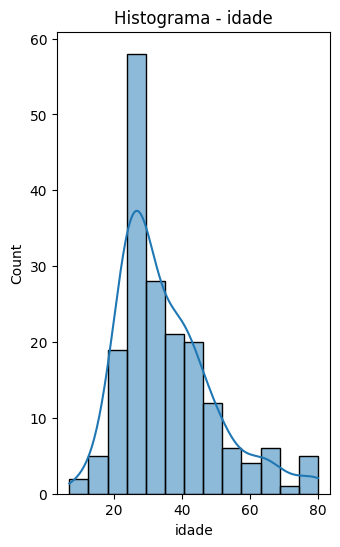

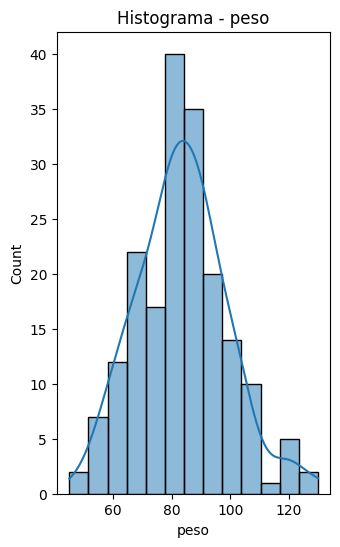

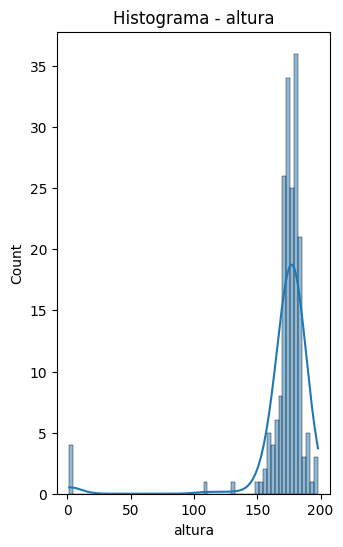

In [263]:
# Analise de normalidade do sexo Masculino

for coluna in quantitativas:
    serie = df_masculino2[coluna].dropna()  # Remover valores nulos

    # Teste Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(serie)

    # Teste D’Agostino e Pearson (Normaltest)
    stat_normal, p_normal = normaltest(serie)

    # Adicionar resultados
    resultados[coluna] = {
        'Shapiro-Wilk': {'estatística': stat_shapiro, 'p-valor': p_shapiro},
    }

    # Visualizações
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True)
    plt.title(f"Histograma - {coluna}")

# Exibir resultados
print("Resultados dos Testes de Normalidade Masculino:")
for coluna, teste in resultados.items():
    print(f"\nVariável: {coluna}")
    for nome, valores in teste.items():
        print(f"  {nome}: Estatística = {valores['estatística']:.4f}, p-valor = {valores['p-valor']:.4f}")

Resultados dos Testes de Normalidade Masculino:

Variável: idade
  Shapiro-Wilk: Estatística = 0.9277, p-valor = 0.0000

Variável: peso
  Shapiro-Wilk: Estatística = 0.9324, p-valor = 0.0000

Variável: altura
  Shapiro-Wilk: Estatística = 0.4315, p-valor = 0.0000


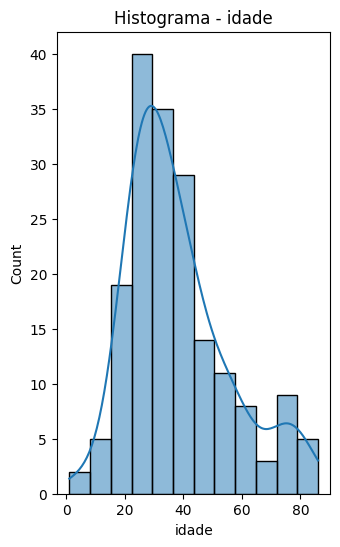

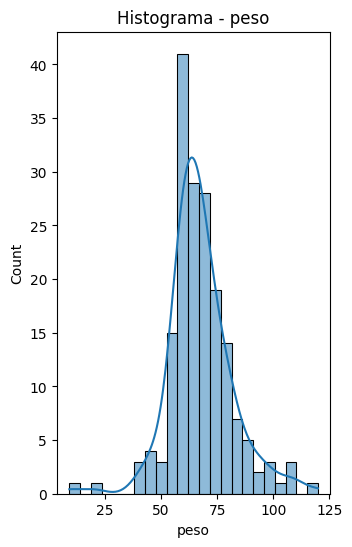

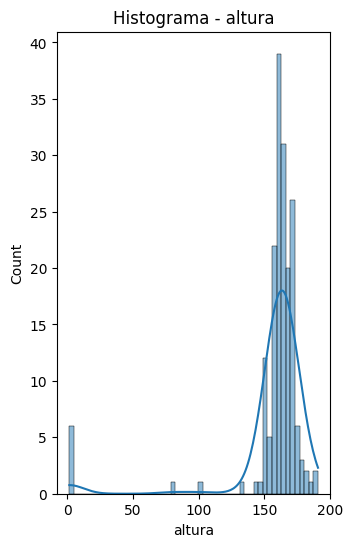

In [264]:
# Analise de normalidade do sexo feminino

for coluna in quantitativas:
    serie = df_feminino2[coluna].dropna()  # Remover valores nulos

    # Teste Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(serie)

    # Teste D’Agostino e Pearson (Normaltest)
    stat_normal, p_normal = normaltest(serie)

    # Adicionar resultados
    resultados[coluna] = {
        'Shapiro-Wilk': {'estatística': stat_shapiro, 'p-valor': p_shapiro},
    }

    # Visualizações
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True)
    plt.title(f"Histograma - {coluna}")

# Exibir resultados
print("Resultados dos Testes de Normalidade Masculino:")
for coluna, teste in resultados.items():
    print(f"\nVariável: {coluna}")
    for nome, valores in teste.items():
        print(f"  {nome}: Estatística = {valores['estatística']:.4f}, p-valor = {valores['p-valor']:.4f}")

#### Conclusão

Os três testes de normalidade (para idade, peso e altura) indicam que os dados não seguem uma distribuição normal. O p-valor de 0.0000 em todos os casos é suficientemente baixo para rejeitar a hipótese de normalidade com um alto nível de confiança.

### Testes de Independência

In [265]:
# Variáveis de interesse

atributos = ['consumo_alcool', 'fumante', 'exercícios', 'dieta']

In [266]:
# Realizar o teste de qui-quadrado para cada variável
for atributo in atributos:
    # Criar tabela de contingência
    tabela_contingencia = pd.crosstab(df['sexo'], df[atributo])
    
    # Aplicar o teste qui-quadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Mostrar os resultados
    print(f"Teste de independência entre sexo e {atributo}:")
    print(f"p-valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print("Resultado: Existe uma associação significativa entre sexo e", atributo)
    else:
        print("Resultado: Não existe uma associação significativa entre sexo e", atributo)
    print("-" * 50)

Teste de independência entre sexo e consumo_alcool:
p-valor: 0.0354
Resultado: Existe uma associação significativa entre sexo e consumo_alcool
--------------------------------------------------
Teste de independência entre sexo e fumante:
p-valor: 0.2846
Resultado: Não existe uma associação significativa entre sexo e fumante
--------------------------------------------------
Teste de independência entre sexo e exercícios:
p-valor: 0.3316
Resultado: Não existe uma associação significativa entre sexo e exercícios
--------------------------------------------------
Teste de independência entre sexo e dieta:
p-valor: 0.0102
Resultado: Existe uma associação significativa entre sexo e dieta
--------------------------------------------------


#### Conclusão

* Consumo de Álcool e Dieta apresentaram uma associação significativa com o sexo, indicando que o comportamento em relação a essas variáveis pode ser diferente entre homens e mulheres.
* Fumante e Exercícios não mostraram uma associação significativa com o sexo, sugerindo que, na amostra, esses comportamentos são mais independentes do sexo.

### Teste de Homogeneídade

In [267]:
# Variáveis categóricas para análise de homogeneidade

categorias = ['estado_civil', 'escolaridade', 'consumo_alcool', 'fumante', 'exercícios', 'dieta']

In [268]:
# Realizar o teste de qui-quadrado de homogeneidade
for categoria in categorias:
    # Criar a tabela de contingência para a variável com a separação por sexo
    tabela_contingencia = pd.crosstab(df['sexo'], df[categoria])
    
    # Aplicar o teste qui-quadrado de homogeneidade
    chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Exibir os resultados
    print(f"Teste de homogeneidade entre sexo e {categoria}:")
    print(f"p-valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print(f"Resultado: Não existe homogeneidade entre as distribuições de {categoria} por sexo.")
    else:
        print(f"Resultado: Existe homogeneidade entre as distribuições de {categoria} por sexo.")
    print("-" * 50)

Teste de homogeneidade entre sexo e estado_civil:
p-valor: 0.0006
Resultado: Não existe homogeneidade entre as distribuições de estado_civil por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e escolaridade:
p-valor: 0.8631
Resultado: Existe homogeneidade entre as distribuições de escolaridade por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e consumo_alcool:
p-valor: 0.0354
Resultado: Não existe homogeneidade entre as distribuições de consumo_alcool por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e fumante:
p-valor: 0.2846
Resultado: Existe homogeneidade entre as distribuições de fumante por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e exercícios:
p-valor: 0.3316
Resultado: Existe homogeneidade entre as distribuições de exercícios por sexo.
--------------------------------------------------
Teste de hom

#### Conclusão

A análise de homogeneidade revelou que:
* Estado Civil, Consumo de Álcool e Dieta apresentam distribuições significativamente diferentes entre homens e mulheres, indicando falta de homogeneidade.
* Escolaridade, Fumante e Exercícios têm distribuições semelhantes entre os grupos de sexo, indicando homogeneidade.

### Criando Dataset *Homogêneo* a partir de uma variável categórica

In [269]:
# Calcular as proporções globais da variável "dieta"
proporcoes_globais = df['dieta'].value_counts(normalize=True)
print("Proporções globais de dieta:")
print(proporcoes_globais)

# Criar um dataset homogêneo
df_homogeneo = pd.DataFrame()

for sexo in df['sexo'].unique():
    grupo = df[df['sexo'] == sexo]
    
    # Redistribuir as categorias de "dieta" conforme as proporções globais
    for categoria, proporcao in proporcoes_globais.items():
        n_amostras = int(proporcao * len(grupo))
        amostra = grupo[grupo['dieta'] == categoria].sample(n=n_amostras, replace=True, random_state=42)
        df_homogeneo = pd.concat([df_homogeneo, amostra])

Proporções globais de dieta:
dieta
1.0    0.706522
4.0    0.163043
2.0    0.078804
3.0    0.051630
Name: proportion, dtype: float64


In [270]:
df_homogeneo

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
235,Giovanni Petruitis Cantagesso,20.0,3515110,40.0,M,99.0,184.0,2.0,4.0,1.0,4.0,2.0,1.0
222,Gabriel Padula da Silva,19.0,9241480,50.0,M,60.0,177.0,1.0,2.0,6.0,4.0,3.0,1.0
51,Carlos Menezes de Oliveira,5.0,49480000,32.0,M,90.0,175.0,1.0,1.0,4.0,4.0,4.0,1.0
243,Carlos Augusto Reis,21.0,6730000,35.0,M,80.0,174.0,4.0,4.0,6.0,4.0,4.0,1.0
176,Lenon Alcântara Machado,15.0,7500000,32.0,M,74.0,179.0,1.0,5.0,4.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Grasiely Lima Pastori Vieira,30.0,67890123,24.0,F,64.0,162.0,1.0,3.0,3.0,4.0,2.0,3.0
357,Ryan de Oliveira Queiroz,32.0,2543000,77.0,F,79.0,176.0,1.0,3.0,4.0,4.0,1.0,3.0
142,Douglas Cardoso dos Santos,11.0,60694-170,31.0,F,60.0,167.0,2.0,4.0,4.0,4.0,4.0,3.0
333,Grasiely Lima Pastori Vieira,30.0,67890123,24.0,F,64.0,162.0,1.0,3.0,3.0,4.0,2.0,3.0
